Imports 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score, precision_score

In [2]:
df_Titanic = pd.read_csv('Data/train.csv')
df_Titanic.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df_Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_Titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df_Titanic['Age'].interpolate(method='linear', inplace=True)

/tmp/ipykernel_2539/3426162874.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Titanic['Age'].interpolate(method='linear', inplace=True)


In [6]:
columns_to_drop = ['Age', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name', 'PassengerId']
df_Titanic = df_Titanic.drop(columns=columns_to_drop)
df_Titanic

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0
...,...,...,...,...,...
886,0,2,male,0,0
887,1,1,female,0,0
888,0,3,female,1,2
889,1,1,male,0,0


In [7]:
encoder = OneHotEncoder(sparse_output=False)
sex_encoded = encoder.fit_transform(df_Titanic[['Sex']])
sex_encoded_df = pd.DataFrame(sex_encoded, columns=encoder.get_feature_names_out(['Sex']))
df_Titanic = pd.concat([df_Titanic, sex_encoded_df], axis=1)
df_Titanic.drop('Sex', axis=1, inplace=True)

df_Titanic


,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male
0,0,3,1,0,0.0,1.0
1,1,1,1,0,1.0,0.0
2,1,3,0,0,1.0,0.0
3,1,1,1,0,1.0,0.0
4,0,3,0,0,0.0,1.0
...,...,...,...,...,...,...
886,0,2,0,0,0.0,1.0
887,1,1,0,0,1.0,0.0
888,0,3,1,2,1.0,0.0
889,1,1,0,0,0.0,1.0


In [8]:
X = df_Titanic.drop('Survived', axis=1)
y = df_Titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")
print(f"Precision Score: {precision:.4f}")

Accuracy Score: 0.7932
Average Precision Score: 0.6636
Precision Score: 0.7921


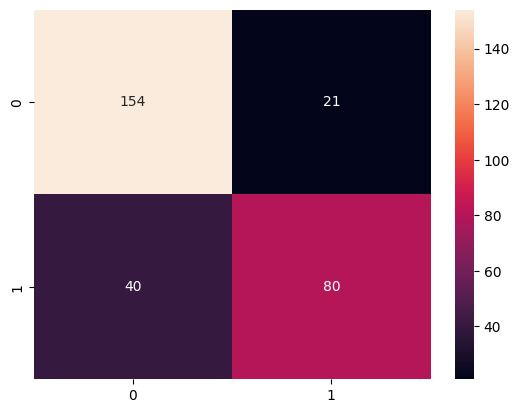

In [11]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='');

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
